In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc

**data de la NOAA sur l'anomalie de temperature**

In [8]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
dat = xr.open_dataset(url)
dat

<xarray.Dataset>
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

In [9]:
temps1="2000-10-01"

Datatemps1=dat.sel(time=temps1)
Datatemps1

temps2="1900-10-01"

Datatemps2=dat.sel(time=temps2)
Datatemps2

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 1900-10-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

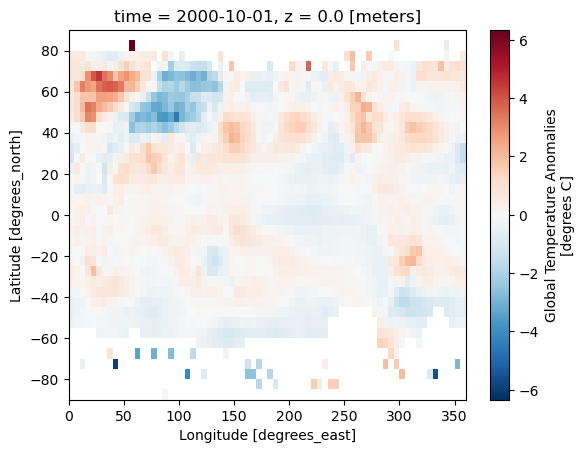

In [10]:
Datatemps1["anom"].plot()


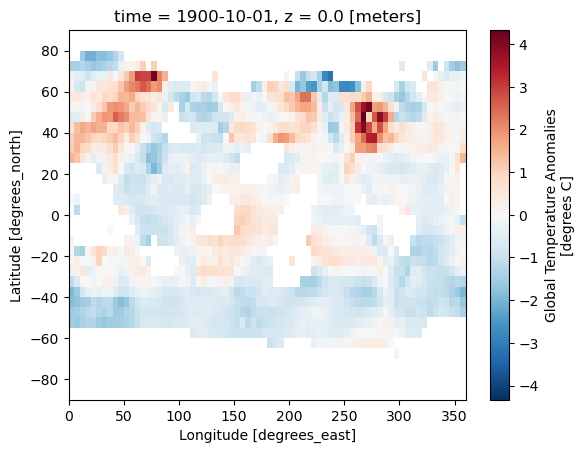

In [11]:
Datatemps2["anom"].plot()

Text(0.5, 1.0, 'Carte des anomalies - 1900')

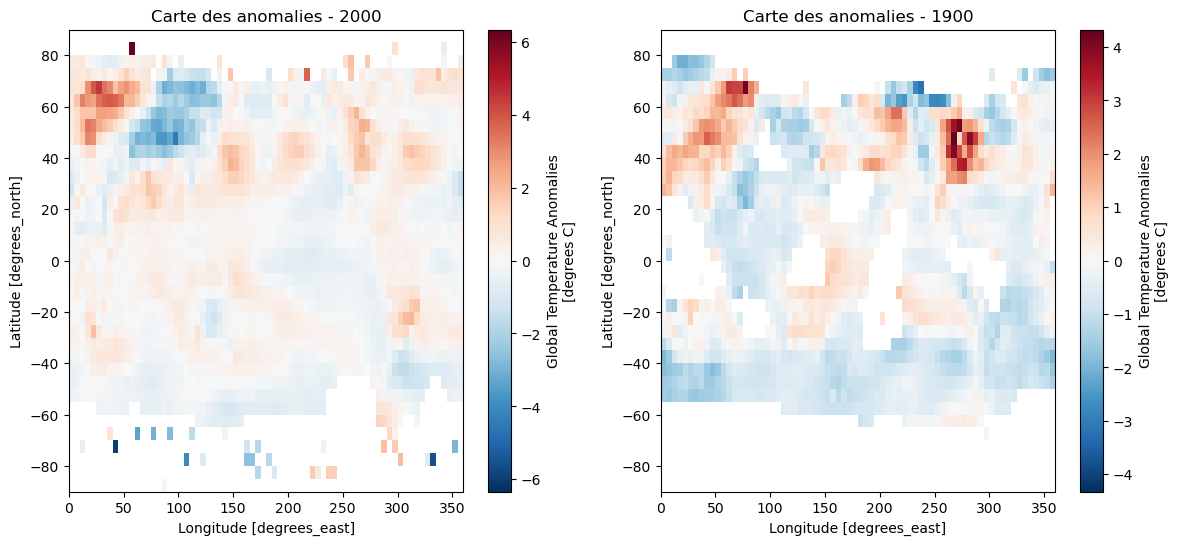

In [12]:

#Carte 1
fig,axes=plt.subplots(1,2, figsize=(14,6), subplot_kw={'projection': None}) 
Datatemps1["anom"].plot(ax=axes[0])
axes[0].set_title("Carte des anomalies - 2000")
#Carte 2
Datatemps2["anom"].plot(ax=axes[1])
axes[1].set_title("Carte des anomalies - 1900")

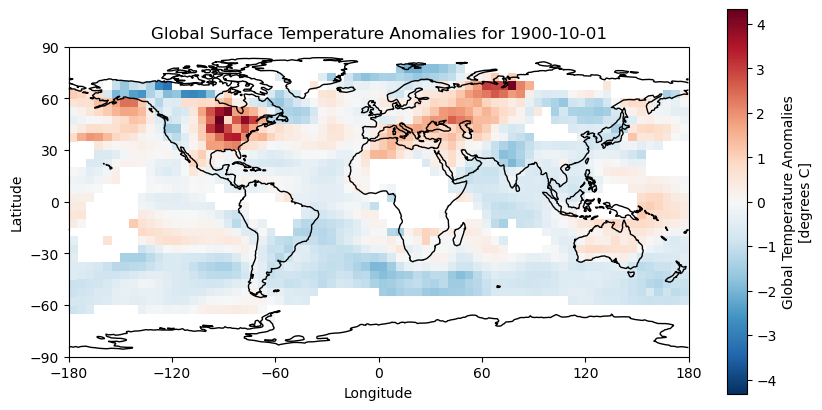

In [13]:
import cartopy.crs as ccrs
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
Datatemps2['anom'].plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
plt.title(f'Global Surface Temperature Anomalies for {temps2}')
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig('temperature_anomalies.png')
plt.show()

In [14]:
dat

<xarray.Dataset>
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

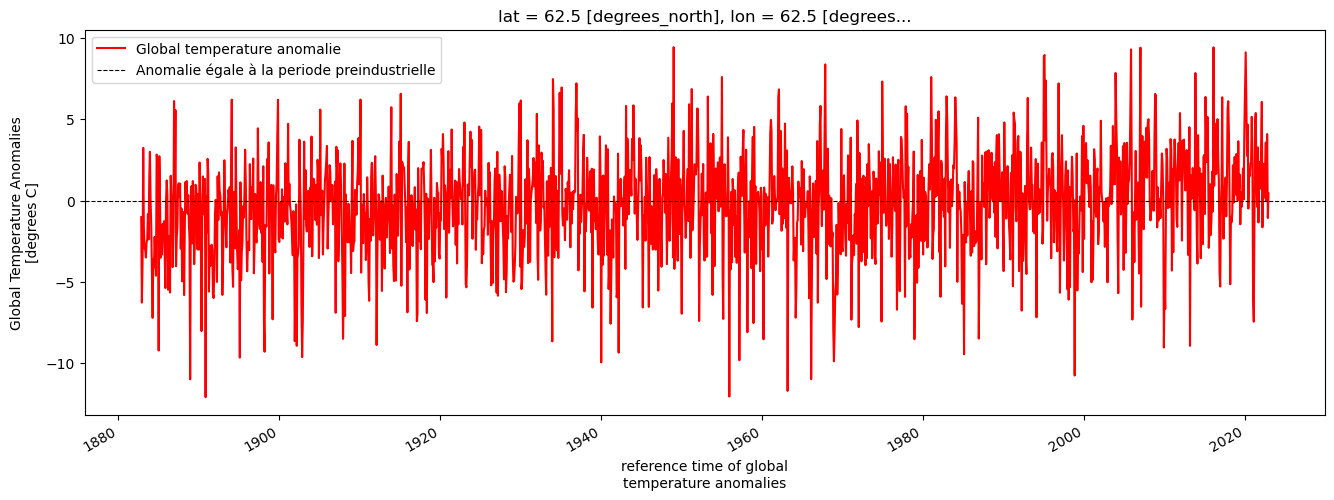

In [48]:
plt.figure (figsize=( 16,5))
tempactuel="2023-10-01"
dat["anom"].sel(lon=60, lat=60,  method= "nearest").plot( label="Global temperature anomalie", color= "red" )
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label="Anomalie égale à la periode preindustrielle")

plt.legend()


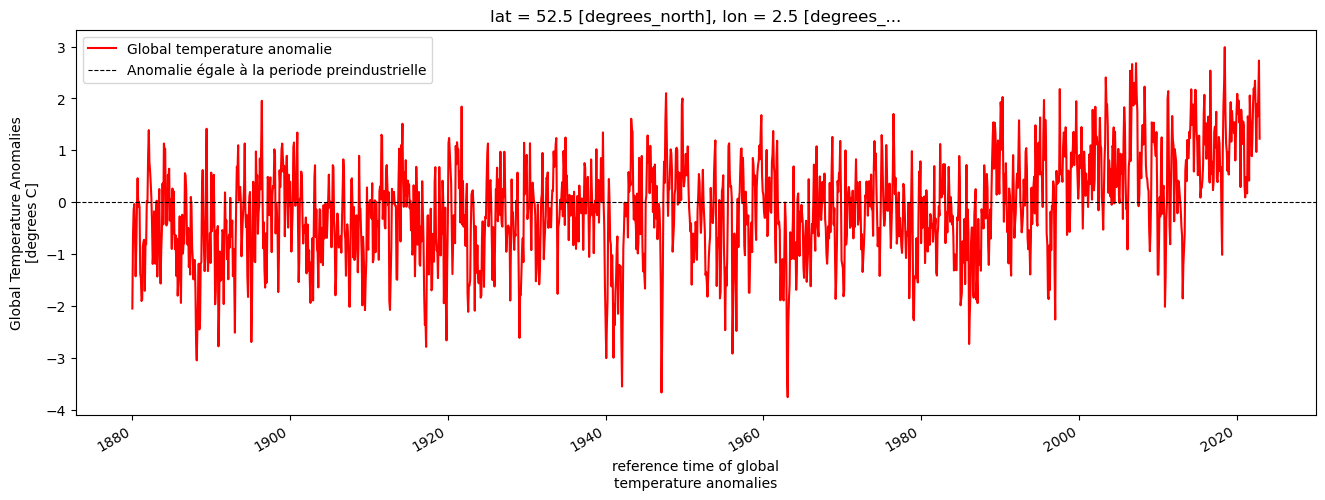

In [52]:
plt.figure (figsize=( 16,5))
tempactuel="2023-10-01"
dat["anom"].sel(lon=-100, lat=50,  method= "nearest").plot( label="Global temperature anomalie", color= "red" )
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label="Anomalie égale à la periode preindustrielle")

plt.legend()

In [16]:

tempactuel="2023-10-01"
Datactuel= dat.sel(time= tempactuel,  method= "nearest")
Datactuel

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 2022-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

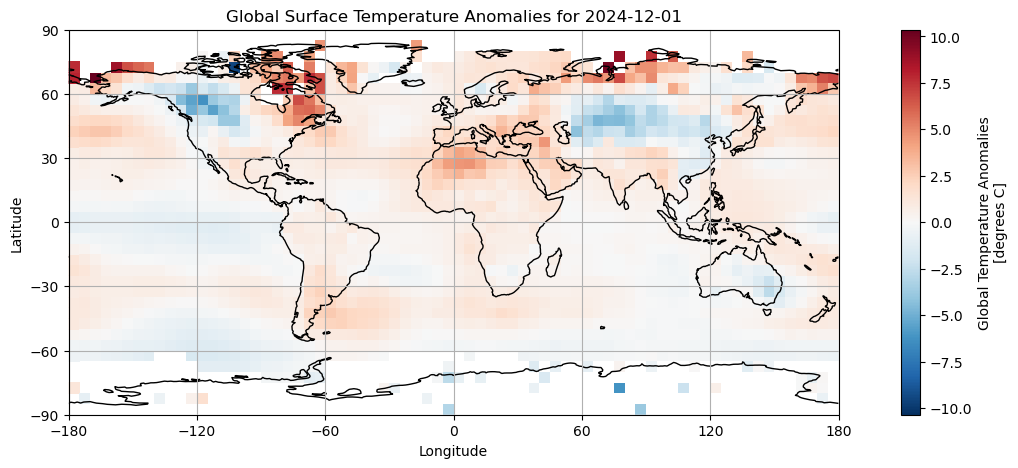

In [17]:
import cartopy.crs as ccrs

tempactuel="2024-12-01"
Datactuel= dat.sel(time= tempactuel,  method= "nearest")
Datactuel
plt.figure(figsize=(16, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
Datactuel['anom'].plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
plt.title(f'Global Surface Temperature Anomalies for {tempactuel}')
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid()
plt.savefig('temperature_anomalies.png')
plt.show()

**data horaire de Janvier 2024 sur le SWE**

In [225]:
import xarray as xr
file = 'data_1.nc'
doc = xr.open_dataset(file)
doc

<xarray.Dataset>
Dimensions:     (valid_time: 744, latitude: 201, longitude: 201)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2024-01-01 ... 2024-01-31T23:00:00
  * latitude    (latitude) float64 60.0 59.9 59.8 59.7 ... 40.3 40.2 40.1 40.0
  * longitude   (longitude) float64 270.0 270.1 270.2 ... 289.8 289.9 290.0
    expver      (valid_time) object ...
Data variables:
    sde         (valid_time, latitude, longitude) float32 ...
    snowc       (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [145]:
import matplotlib.pyplot as plt

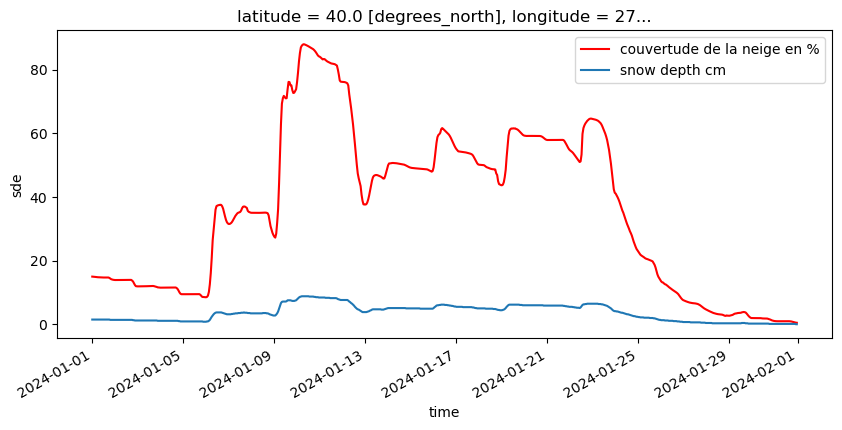

In [244]:

plt.figure(figsize=(10,4))
doc["snowc"].sel(longitude=100, latitude=-70, method='nearest').plot( label="couvertude de la neige en %", color= "red" )

(doc["sde"].sel(longitude=100, latitude=-70, method='nearest')*100).plot( label="snow depth cm")

plt.legend()

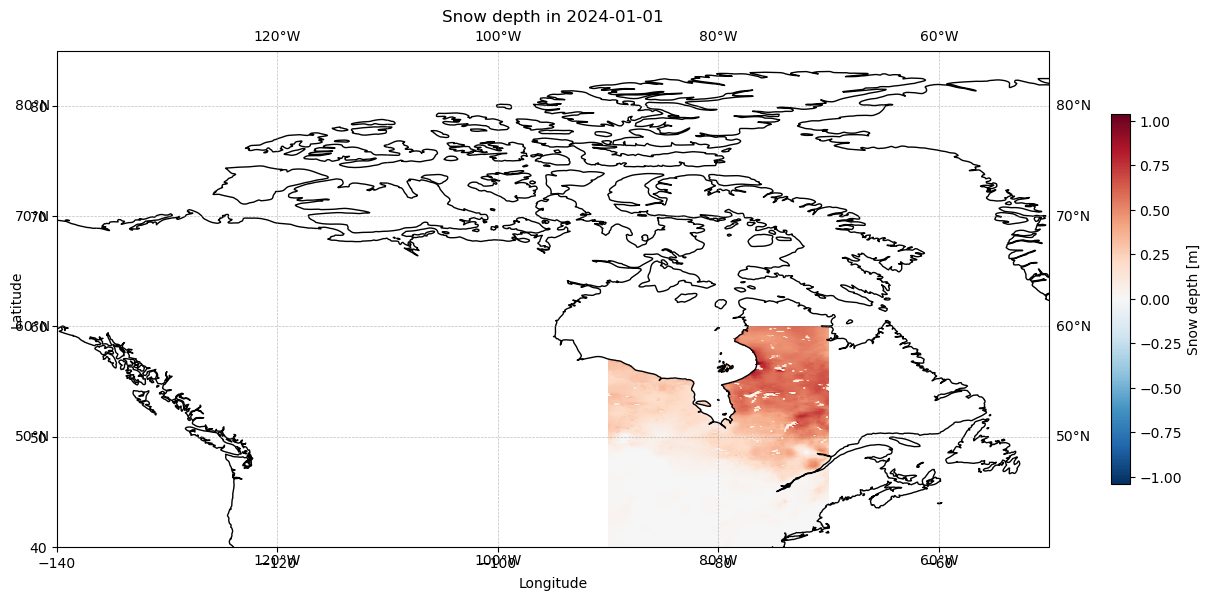

In [246]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

tempactuel = "2024-01-01"
doc = doc.sel(valid_time=tempactuel, method="nearest")

plt.figure(figsize=(16, 8))  
ax = plt.axes(projection=ccrs.PlateCarree())
doc['sde'].plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.6}) 

ax.coastlines()

# Définir les limites du zoom sur le Canada
ax.set_extent([-140, -50, 40, 85], crs=ccrs.PlateCarree())

plt.title(f'Snow depth in {tempactuel}')
ax.set_xticks(range(-140, -40, 20), crs=ccrs.PlateCarree())  # Limites spécifiques pour le Canada
ax.set_yticks(range(40, 90, 10), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Grille
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

plt.show()


In [179]:
dic

(array([4.00758e+05, 9.28030e+04, 9.92890e+04, 3.55530e+04, 6.34890e+04,
        8.21070e+04, 1.55030e+04, 2.08600e+03, 3.55000e+02, 1.53000e+02]),
 array([-7.34536472e-24,  1.08691409e-01,  2.17382818e-01,  3.26074213e-01,
         4.34765637e-01,  5.43457031e-01,  6.52148426e-01,  7.60839820e-01,
         8.69531274e-01,  9.78222668e-01,  1.08691406e+00]),
 <BarContainer object of 10 artists>)

In [321]:
import os
import glob
import pandas as pd

data = "/Users/philippe/Downloads/2024/*"
files = glob.glob(data)

dataframes = []

for i in files:
    df = pd.read_csv(i)  
    dataframes.append(df)

final_data = pd.concat(dataframes, ignore_index=True, axes=0)


TypeError: concat() got an unexpected keyword argument 'axes'

In [ ]:
final_data.head(40)



In [288]:
final_data['DATE'] = pd.to_datetime(final_data['DATE'])
final_data = final_data.set_index('DATE')
final_data


,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
DATE,,,,,,,,,,,,,,,,,,,,,
2024-01-01,57328099999,31.2000,107.5000,344.0,"DA XIAN, CH",49.0,6,48.8,6,1022.5,...,1.9,999.9,49.6,,41.2,,0.16,G,999.9,10000
2024-01-02,57328099999,31.2000,107.5000,344.0,"DA XIAN, CH",52.1,5,47.9,5,1024.8,...,3.9,999.9,58.8,,46.9,,0.00,G,999.9,0
2024-01-03,57328099999,31.2000,107.5000,344.0,"DA XIAN, CH",49.6,4,45.3,4,1026.6,...,1.9,999.9,58.8,,45.1,,0.00,G,999.9,100000
2024-01-04,57328099999,31.2000,107.5000,344.0,"DA XIAN, CH",54.6,4,44.1,4,1018.7,...,1.9,999.9,64.6,,47.1,,0.00,G,999.9,0
2024-01-06,57328099999,31.2000,107.5000,344.0,"DA XIAN, CH",53.8,6,48.1,6,1022.9,...,1.9,999.9,60.3,,49.1,,0.00,G,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,99999904222,40.6507,-122.6068,432.2,"REDDING 12 WNW, CA US",48.0,24,9999.9,0,9999.9,...,999.9,999.9,54.3,,44.6,,0.65,G,999.9,0
2024-12-28,99999904222,40.6507,-122.6068,432.2,"REDDING 12 WNW, CA US",50.6,24,9999.9,0,9999.9,...,999.9,999.9,53.1,*,49.6,,0.19,G,999.9,0
2024-12-29,99999904222,40.6507,-122.6068,432.2,"REDDING 12 WNW, CA US",52.2,24,9999.9,0,9999.9,...,999.9,999.9,55.6,,48.7,,0.50,G,999.9,0


In [297]:
final_data.columns

Index(['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TEMP',
       'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP', 'SLP_ATTRIBUTES',
       'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES', 'MXSPD', 'GUST', 'MAX', 'MAX_ATTRIBUTES', 'MIN',
       'MIN_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNDP', 'FRSHTT'],
      dtype='object')

In [299]:
final_data.describe()

,LATITUDE,LONGITUDE,ELEVATION,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,...,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT
count,3.919438e+06,3.919438e+06,3.919098e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,...,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06,3.931419e+06
mean,3.181530e+01,-1.630113e+00,3.611111e+02,5.702798e+01,1.865941e+01,5.039042e+02,1.757943e+01,4.115734e+03,1.060761e+01,7.024187e+02,...,1.265444e+01,4.128562e+01,1.785345e+01,5.411809e+01,7.259302e+02,7.317078e+01,5.617532e+01,8.251447e+00,9.334523e+02,8.185997e+03
std,2.799756e+01,8.574916e+01,5.411796e+02,2.256111e+01,7.336410e+00,2.085925e+03,8.193717e+00,4.272008e+03,9.952295e+00,4.304978e+02,...,1.019035e+01,1.834719e+02,7.988916e+00,2.006893e+02,4.390145e+02,2.555779e+02,2.866312e+02,2.739060e+01,2.477390e+02,2.389836e+04
min,-9.000000e+01,-1.799833e+02,-9.999000e+02,-1.093000e+02,4.000000e+00,-1.156000e+02,0.000000e+00,9.466000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,9.700000e+00,-1.035000e+02,-1.131000e+02,0.000000e+00,4.000000e-01,0.000000e+00
25%,2.429277e+01,-8.255480e+01,3.078000e+01,4.330000e+01,9.000000e+00,3.390000e+01,8.000000e+00,1.011700e+03,0.000000e+00,2.040000e+01,...,0.000000e+00,3.300000e+00,8.000000e+00,7.400000e+00,3.210000e+01,5.180000e+01,3.470000e+01,0.000000e+00,9.999000e+02,0.000000e+00
50%,4.007892e+01,8.200000e+00,1.540000e+02,6.000000e+01,2.400000e+01,4.890000e+01,2.400000e+01,1.019700e+03,8.000000e+00,9.717000e+02,...,9.000000e+00,5.400000e+00,2.400000e+01,1.110000e+01,9.999000e+02,7.070000e+01,5.000000e+01,0.000000e+00,9.999000e+02,0.000000e+00
75%,4.925000e+01,6.228333e+01,4.401300e+02,7.470000e+01,2.400000e+01,6.370000e+01,2.400000e+01,9.999900e+03,2.300000e+01,9.999000e+02,...,2.400000e+01,8.400000e+00,2.400000e+01,1.550000e+01,9.999000e+02,8.530000e+01,6.480000e+01,3.000000e-02,9.999000e+02,1.000000e+04
max,8.365000e+01,1.797500e+02,4.613000e+03,1.100000e+02,2.400000e+01,9.999900e+03,2.400000e+01,9.999900e+03,2.400000e+01,9.999000e+02,...,2.400000e+01,9.999000e+02,2.400000e+01,9.999000e+02,9.999000e+02,9.999900e+03,9.999900e+03,9.999000e+01,9.999000e+02,1.111100e+05


In [311]:
final_data.isnull().sum()

STATION                 0
LATITUDE            11981
LONGITUDE           11981
ELEVATION           12321
NAME                11981
TEMP                    0
TEMP_ATTRIBUTES         0
DEWP                    0
DEWP_ATTRIBUTES         0
SLP                     0
SLP_ATTRIBUTES          0
STP                     0
STP_ATTRIBUTES          0
VISIB                   0
VISIB_ATTRIBUTES        0
WDSP                    0
WDSP_ATTRIBUTES         0
MXSPD                   0
GUST                    0
MAX                     0
MAX_ATTRIBUTES          0
MIN                     0
MIN_ATTRIBUTES          0
PRCP                    0
PRCP_ATTRIBUTES         0
SNDP                    0
FRSHTT                  0
dtype: int64